In [1]:
import math
from inspect import isfunction
from functools import partial

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange, reduce
from einops.layers.torch import Rearrange

import torch
from torch import nn, einsum
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from Unet import *
from DiffusionModel import *

In [2]:
# define hyperparameters

image_size = 32
channel = 1

batchsize = 128

timestep = 300
length = 100

lr = 1e-3
epochs = 1

dimmults = (1,2,4,8)

device = "cuda:0" if torch.cuda.is_available() else "cpu"
#device = "cpu"
print(device)

cuda:0


In [3]:
# sample from loaded models

loaded_linear_net = Unet(
    dim=image_size,
    channels=channel,
    dim_mults=dimmults
)
loaded_linear_net, loaded_linear_betas, _, _= load_net_betas(loaded_linear_net, device, "linear_abstract")

tau : 297
tau : 296
tau : 293
tau : 292
tau : 290
tau : 287
tau : 283
tau : 282
tau : 281
tau : 280
tau : 277
tau : 276
tau : 273
tau : 263
tau : 259
tau : 253
tau : 252
tau : 249
tau : 248
tau : 246
tau : 245
tau : 236
tau : 234
tau : 233
tau : 225
tau : 221
tau : 214
tau : 213
tau : 209
tau : 208
tau : 207
tau : 206
tau : 201
tau : 197
tau : 194
tau : 193
tau : 191
tau : 190
tau : 186
tau : 183
tau : 181
tau : 179
tau : 176
tau : 175
tau : 173
tau : 171
tau : 165
tau : 164
tau : 162
tau : 154
tau : 151
tau : 149
tau : 148
tau : 147
tau : 146
tau : 139
tau : 135
tau : 134
tau : 131
tau : 129
tau : 128
tau : 127
tau : 126
tau : 124
tau : 119
tau : 116
tau : 111
tau : 110
tau : 109
tau : 101
tau : 99
tau : 95
tau : 92
tau : 91
tau : 90
tau : 86
tau : 77
tau : 70
tau : 66
tau : 64
tau : 62
tau : 58
tau : 56
tau : 44
tau : 35
tau : 34
tau : 33
tau : 30
tau : 25
tau : 23
tau : 21
tau : 18
tau : 16
tau : 12
tau : 10
tau : 8
tau : 6
tau : 4
tau : 3
tau : 2


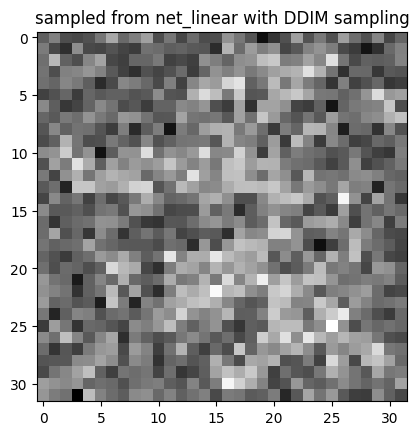

In [4]:
alphas = torch.cumprod(1. - loaded_linear_betas, axis=0)
linear_sqrt_alphas = torch.sqrt(alphas)
linear_sqrt_one_minus_alphas = torch.sqrt(1. - alphas)

res:torch.Tensor = sampling_DDIM(timestep,
                                 linear_sqrt_alphas,
                                 linear_sqrt_one_minus_alphas,
                                 loaded_linear_net,
                                 device,
                                 noise=None,
                                 length=length)

plt.figure()
plt.title("sampled from net_linear with DDIM sampling")
plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')